In [8]:
# Cell 1: Import necessary libraries
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

In [2]:
file_path = 'quark-gluon_data-set_n139306.hdf5'
with h5py.File(file_path, 'r') as f:
    print("Available keys in the HDF5 file:")
    print(list(f.keys()))
    
    print("\nDataset shapes:")
    print(f"X_jets shape: {f['X_jets'].shape}")
    print(f"y shape: {f['y'].shape}")  

Available keys in the HDF5 file:
['X_jets', 'm0', 'pt', 'y']

Dataset shapes:
X_jets shape: (139306, 125, 125, 3)
y shape: (139306,)


In [7]:
def sample_from_hdf5(file_path, n_samples=100000, random_seed=42):
    np.random.seed(random_seed)
    with h5py.File(file_path, 'r') as f:
        total_samples = f['X_jets'].shape[0]
        indices = np.random.choice(total_samples, size=n_samples, replace=False)
        indices.sort()  # Improve read performance
        
        # Initialize arrays
        X_sample = np.empty((n_samples, 125, 125, 3), dtype=np.float32)
        y_sample = np.empty(n_samples, dtype=np.int8)
        
        # Read in chunks
        chunk_size = 1000
        for i in range(0, n_samples, chunk_size):
            chunk_indices = indices[i:i+chunk_size]
            X_sample[i:i+chunk_size] = f['X_jets'][chunk_indices]
            y_sample[i:i+chunk_size] = f['y'][chunk_indices]
            
    return X_sample, y_sample

X_sample, y_sample = sample_from_hdf5(file_path, n_samples=10000)
print(f"\nSampled data shapes:")
print(f"X_sample: {X_sample.shape}")
print(f"y_sample: {y_sample.shape}")
print(f"Class distribution: {np.unique(y_sample, return_counts=True)}")


Sampled data shapes:
X_sample: (10000, 125, 125, 3)
y_sample: (10000,)
Class distribution: (array([0, 1], dtype=int8), array([5045, 4955]))



Training set samples:


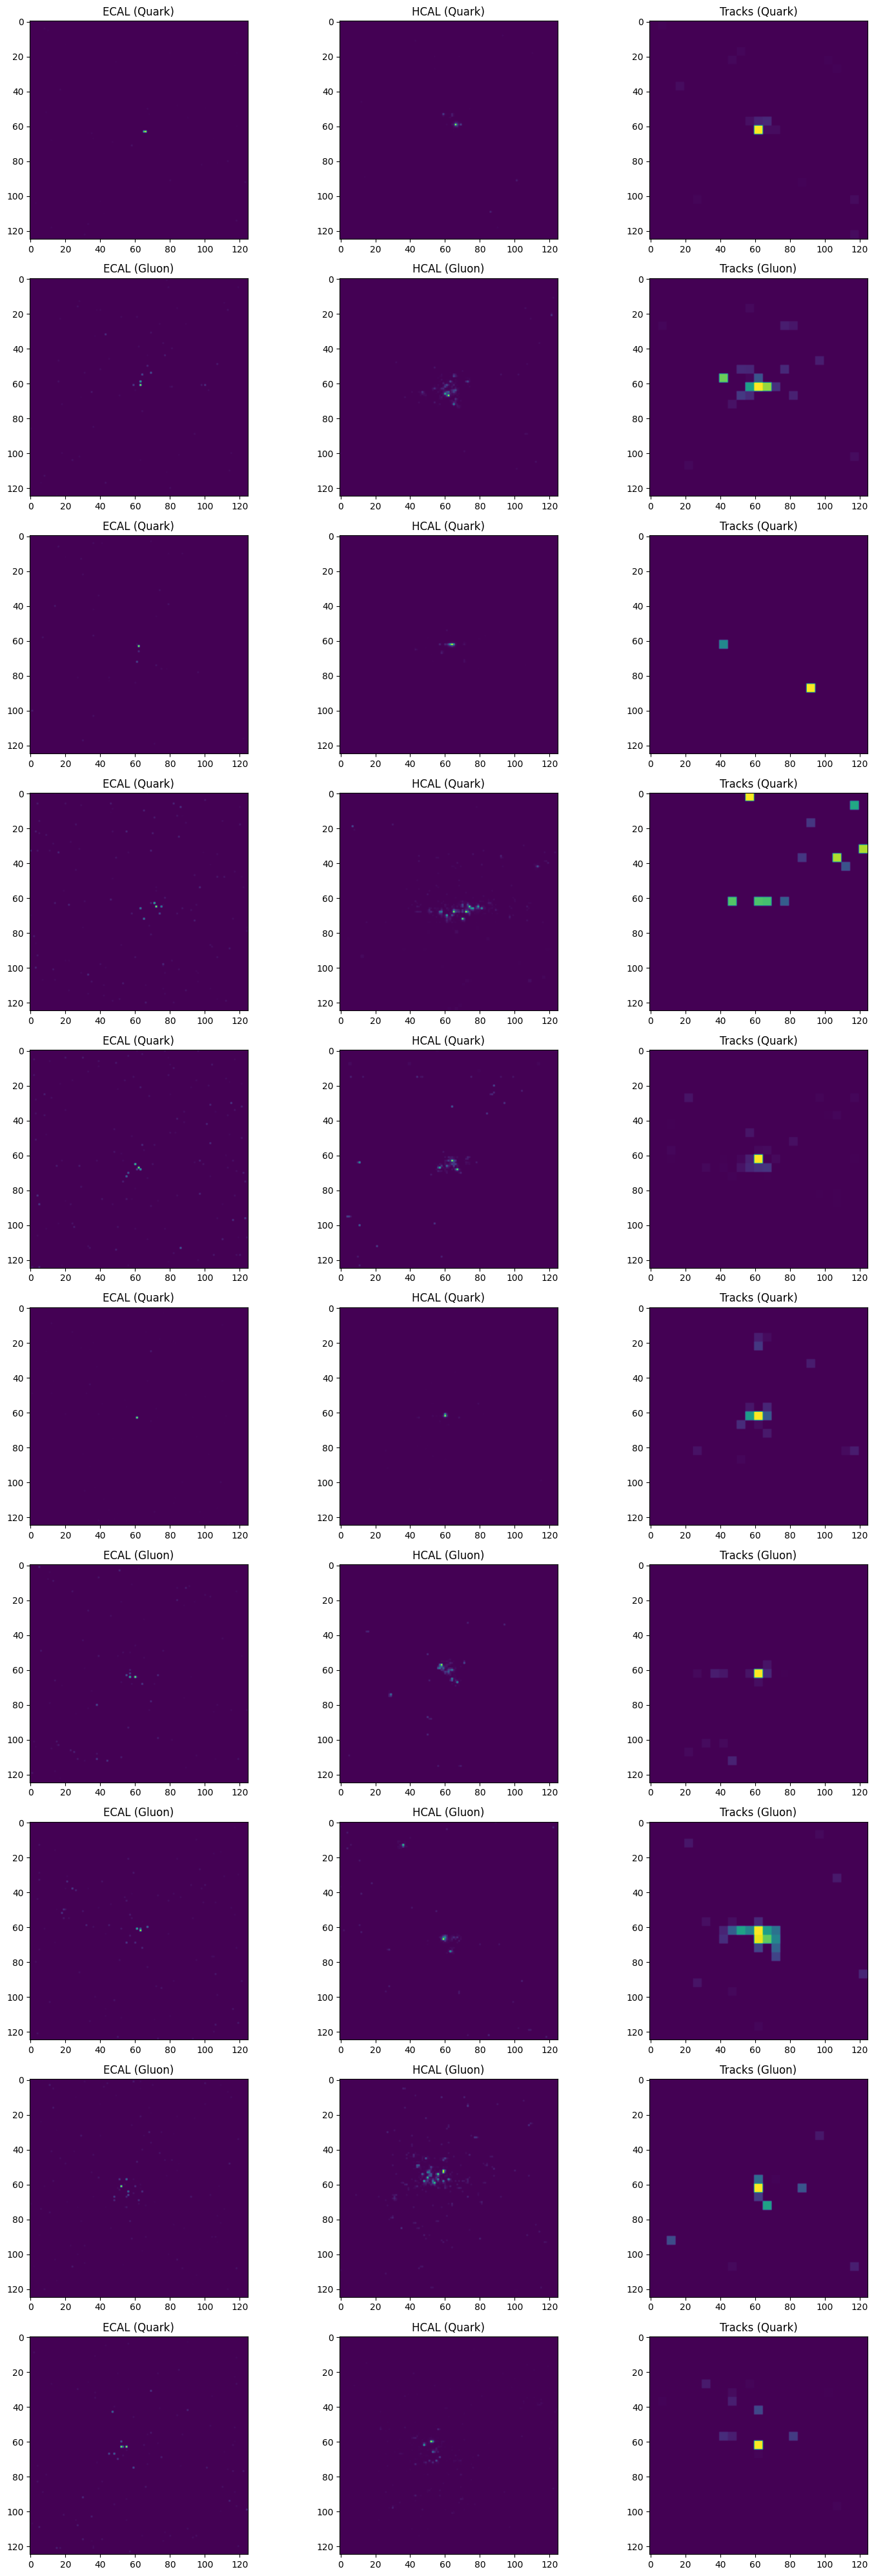

In [6]:
def plot_sample_images(X, y, n_samples=10):
    fig, axes = plt.subplots(n_samples, 3, figsize=(15, n_samples*4))
    if n_samples == 1:
        axes = axes[np.newaxis, :]
    
    for i in range(n_samples):
        idx = np.random.randint(len(X))
        label = 'Quark' if y[idx] == 1 else 'Gluon'
        
        axes[i, 0].imshow(X[idx, :, :, 0], cmap='viridis')
        axes[i, 0].set_title(f'ECAL ({label})')
        
        axes[i, 1].imshow(X[idx, :, :, 1], cmap='viridis')
        axes[i, 1].set_title(f'HCAL ({label})')
        
        axes[i, 2].imshow(X[idx, :, :, 2], cmap='viridis')
        axes[i, 2].set_title(f'Tracks ({label})')
    
    plt.tight_layout()
    plt.show()

print("\nTraining set samples:")
plot_sample_images(X_sample, y_sample)

In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

In [12]:
import os
output_dir = './processed/'
os.makedirs(output_dir, exist_ok=True)

np.save(os.path.join(output_dir, 'X_train.npy'), X_train)
np.save(os.path.join(output_dir, 'X_val.npy'), X_val)
np.save(os.path.join(output_dir, 'X_test.npy'), X_test)
np.save(os.path.join(output_dir, 'y_train.npy'), y_train)
np.save(os.path.join(output_dir, 'y_val.npy'), y_val)
np.save(os.path.join(output_dir, 'y_test.npy'), y_test)

print("Data saved successfully in:", output_dir)

Data saved successfully in: ./processed/
